<a href="https://colab.research.google.com/github/turatsinzejunior83/.net-apps/blob/master/Lung_Cancer_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libralies**

In [ ]:

import pandas as pd
import numpy as np 
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, accuracy_score




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
lung_encoder = LabelEncoder()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
!pip install seaborn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sns.set_style('ticks')

Step 1 - **Loading** **Data**

In [ ]:
lung_cancer = pd.read_csv("lung cancer patient data sets.csv")

In [ ]:
#loading dataset first five column 
lung_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
#loading datasets of last five column
lung_cancer.tail()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
999,P999,47,1,6,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High


In [ ]:
lung_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [ ]:
lung_cancer.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
lung_cancer.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


**Lung Cancer Data Visualization**

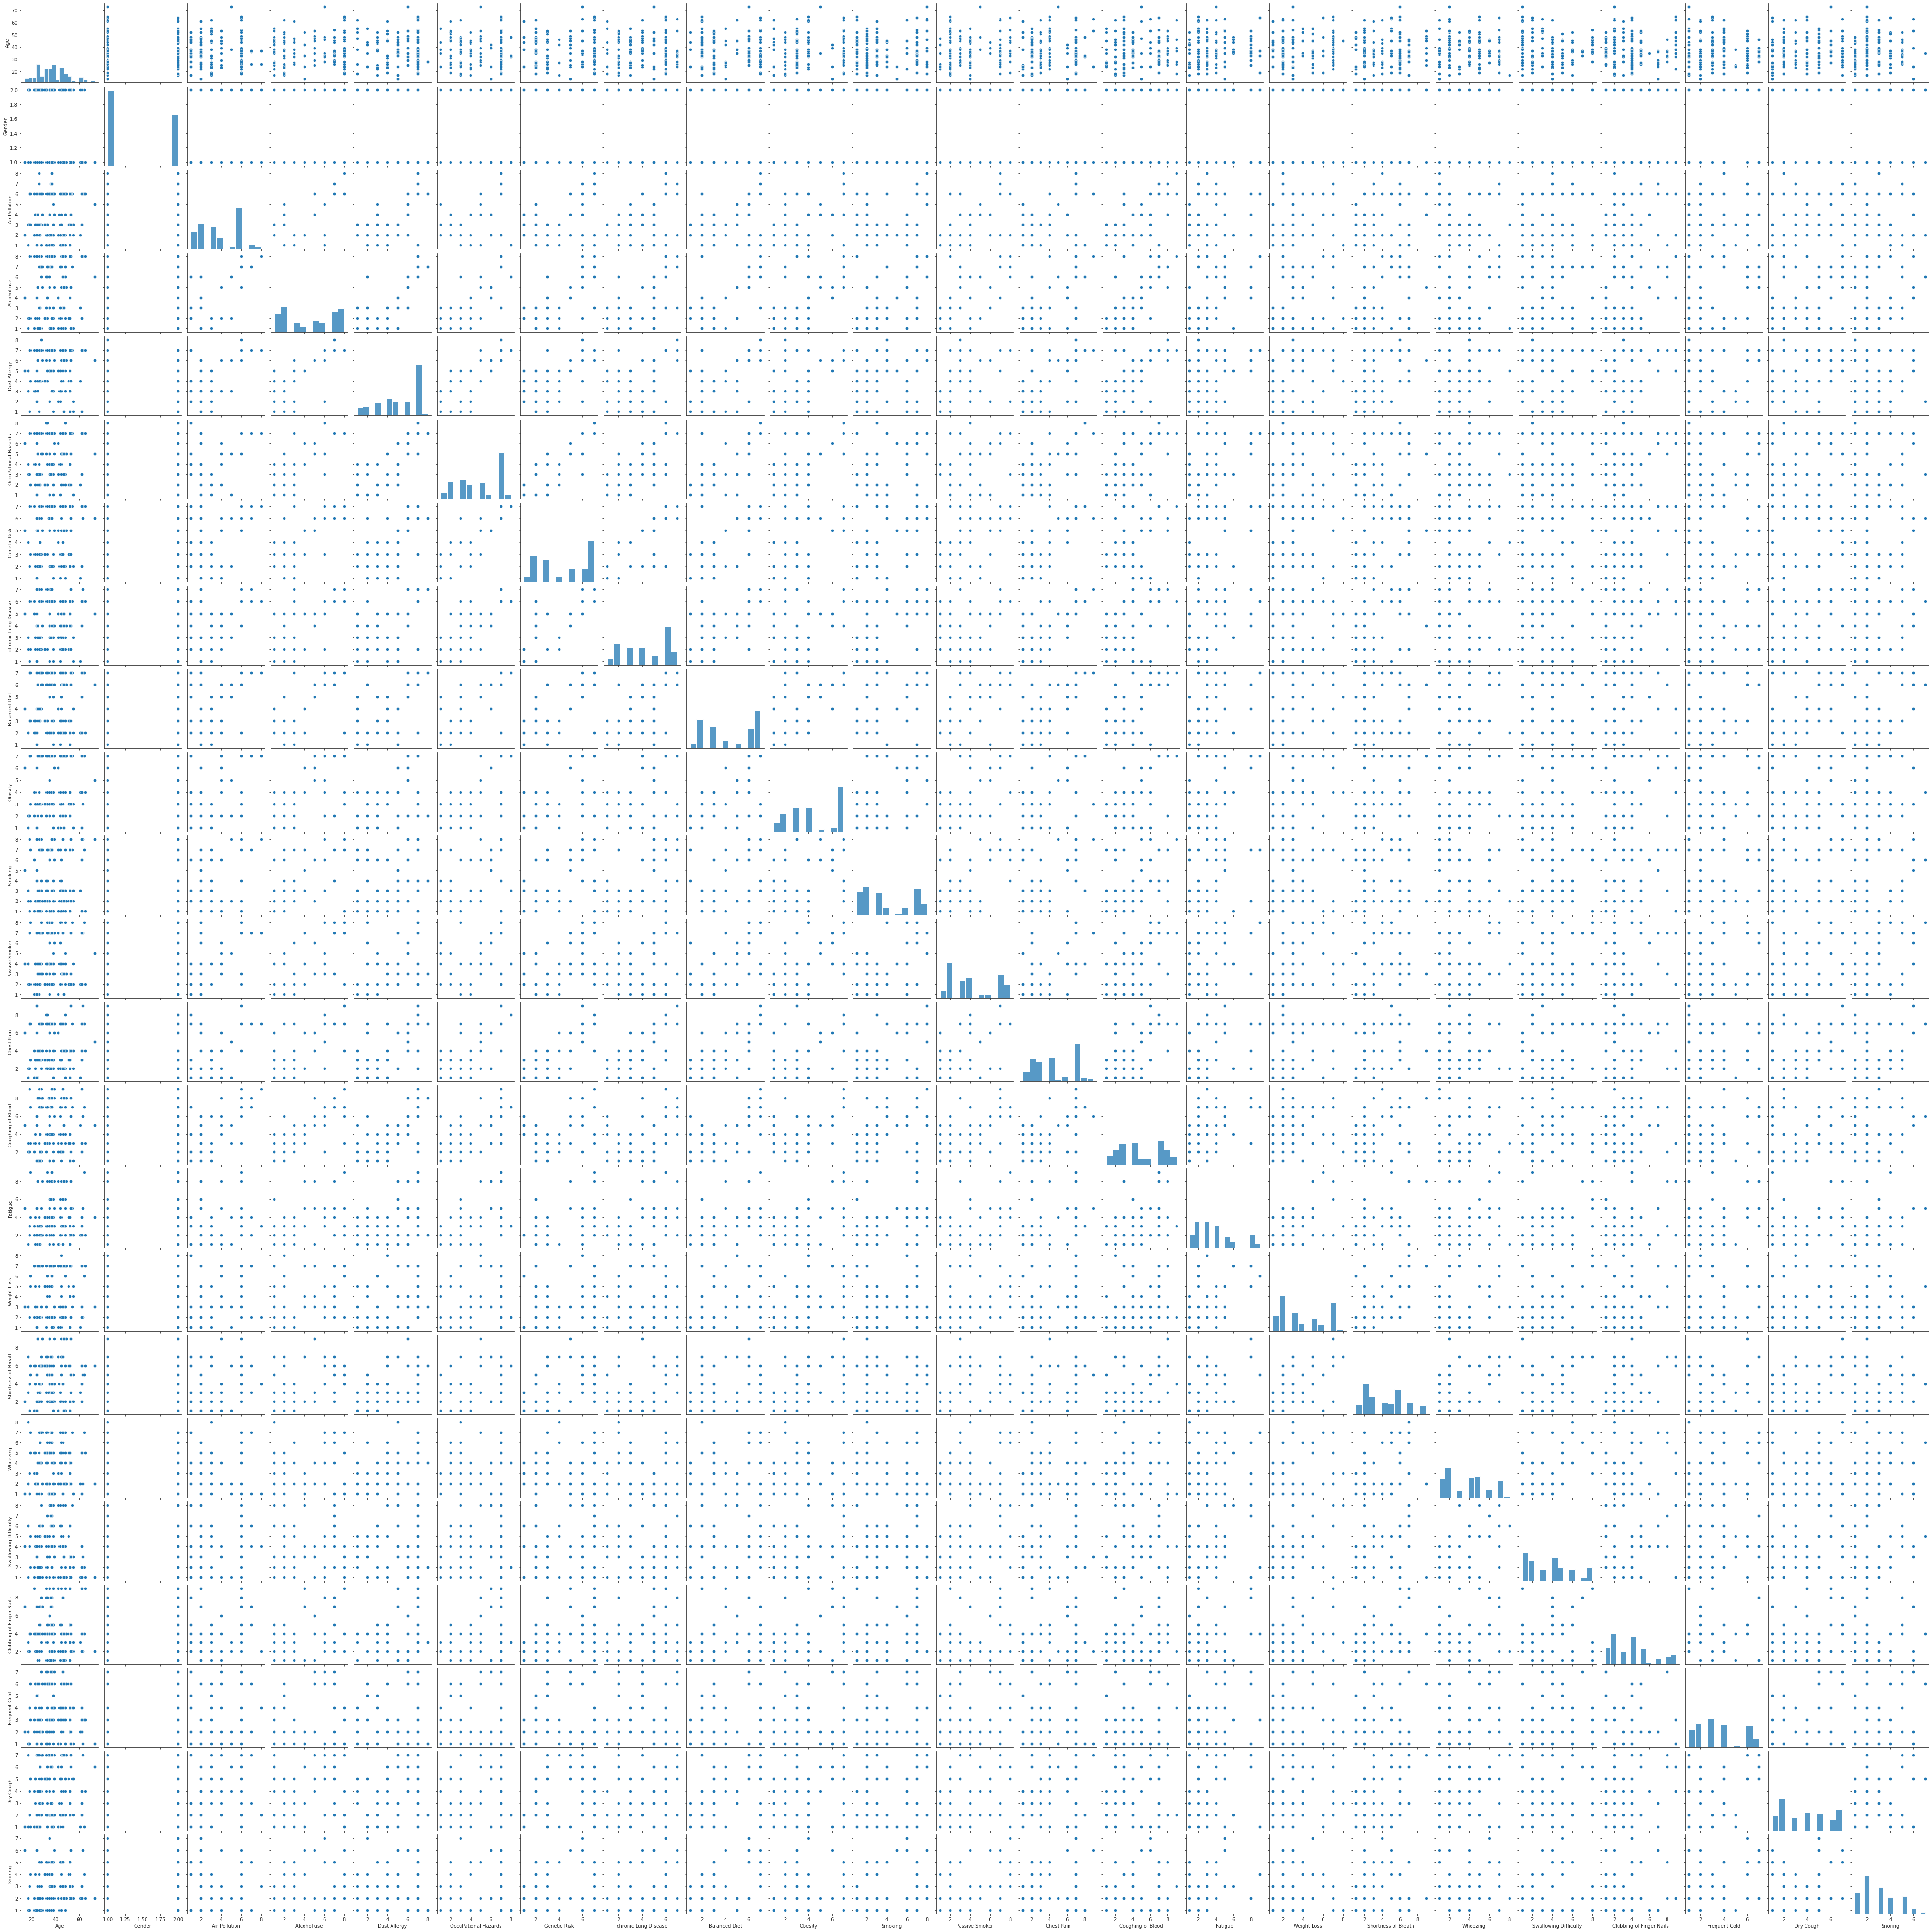

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.apply import SpecificationError
from os import supports_effective_ids
def figure(num=None,  # autoincrement if None, else integer from 1-N
           figsize=None,  # defaults to rc figure.figsize
           dpi=None,  # defaults to rc figure.dpi
           facecolor=supports_effective_ids,  # defaults to rc figure.facecolor
           edgecolor=SpecificationError,  # defaults to rc figure.edgecolor
           frameon=True,
          
           clear=False,
           **kwargs
           ):
  plt.figure(figsize=(20,20), dpi = 300)
           
 
sns.pairplot(lung_cancer)
plt.show()

Step -4 Splitting the Data into Training data & Test **Data**

In [ ]:
#*Training Model step 1 : Logistic regression Model *
lung_cancer.iloc[:,1]=lung_encoder.fit_transform(lung_cancer.iloc[:,1].values)

In [ ]:
lung_cancer

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,14,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,1,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,16,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,18,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,25,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,23,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,18,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,7,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,2,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
x=lung_cancer.iloc[:,2:].values
y=lung_cancer.iloc[:,1].values

In [ ]:
print(x)

[[1 2 4 ... 3 4 'Low']
 [1 3 1 ... 7 2 'Medium']
 [1 4 5 ... 7 2 'High']
 ...
 [2 4 5 ... 7 2 'High']
 [2 6 8 ... 2 3 'High']
 [1 6 5 ... 7 2 'High']]


In [ ]:
lung_cancer['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [ ]:
#mapping categorical values to numerical values
lung_cancer['Level']=lung_cancer['Level'].map({'High':2,'Medium':1,'Low':0})

In [ ]:
lung_cancer

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,14,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,P10,1,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,P100,16,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,P1000,18,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,P101,25,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,23,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,2
996,P996,18,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,2
997,P997,7,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
998,P998,2,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [ ]:
x=lung_cancer.iloc[:,2:].values
y=lung_cancer.iloc[:,1].values

In [ ]:
x_fit = sc.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_fit,y,test_size=0.25)

In [ ]:
print(x_train.shape)
x_train

(750, 23)


array([[-0.81990292,  1.06436231,  1.31224973, ...,  1.54417079,
         2.08555464,  1.15098003],
       [-0.81990292, -0.41391868, -0.97855574, ...,  0.56281026,
         0.72865507, -0.07607757],
       [ 1.21965659, -0.41391868, -1.36035665, ...,  0.07213   ,
         0.05020528, -1.30313517],
       ...,
       [ 1.21965659, -0.90667901, -1.36035665, ..., -0.90923053,
         0.05020528, -0.07607757],
       [-0.81990292, -1.39943934,  0.54864791, ..., -0.90923053,
        -1.30669428, -0.07607757],
       [ 1.21965659, -0.90667901,  0.54864791, ...,  0.56281026,
         2.76400442,  1.15098003]])

In [ ]:
model.fit(x_train,y_train,)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Step 6- Model Evaluation and Accuracy**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.6946666666666667


In [ ]:
X_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.588


In [ ]:
#K-Nearest Neighbours(KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         8
           2       0.86      1.00      0.92         6
           3       0.33      0.60      0.43         5
           4       0.00      0.00      0.00         5
           5       0.83      0.71      0.77         7
           6       0.89      0.89      0.89         9
           7       0.46      0.86      0.60         7
           8       1.00      0.67      0.80        12
           9       1.00      1.00      1.00        10
          10       1.00      0.33      0.50         6
          11       1.00      0.75      0.86         4
          12       1.00      1.00      1.00         2
          13       1.00      0.33      0.50         9
          14       0.77      0.56      0.65        18
          15       0.00      0.00      0.00         0
          16       0.47      0.83      0.60        18
          17       0.27    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         8
           2       1.00      0.50      0.67         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.47      1.00      0.64         7
           6       0.71      0.56      0.63         9
           7       1.00      0.71      0.83         7
           8       0.00      0.00      0.00        12
           9       0.90      0.90      0.90        10
          10       1.00      0.33      0.50         6
          11       0.11      0.25      0.15         4
          12       1.00      1.00      1.00         2
          13       0.50      0.89      0.64         9
          14       0.00      0.00      0.00        18
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00        18
          17       0.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         8
           2       1.00      0.50      0.67         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.83      0.71      0.77         7
           6       0.83      0.56      0.67         9
           7       0.46      0.86      0.60         7
           8       1.00      0.33      0.50        12
           9       1.00      1.00      1.00        10
          10       0.60      0.50      0.55         6
          11       1.00      0.75      0.86         4
          12       1.00      1.00      1.00         2
          13       1.00      0.33      0.50         9
          14       0.47      0.39      0.42        18
          15       0.00      0.00      0.00         0
          16       0.91      0.56      0.69        18
          17       0.20    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
#support vector classifier
from sklearn.svm import SVC
svm_model = SVC()
svm_model = lg_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         8
           2       1.00      0.50      0.67         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.83      0.71      0.77         7
           6       0.83      0.56      0.67         9
           7       0.46      0.86      0.60         7
           8       1.00      0.33      0.50        12
           9       1.00      1.00      1.00        10
          10       0.60      0.50      0.55         6
          11       1.00      0.75      0.86         4
          12       1.00      1.00      1.00         2
          13       1.00      0.33      0.50         9
          14       0.47      0.39      0.42        18
          15       0.00      0.00      0.00         0
          16       0.91      0.56      0.69        18
          17       0.20    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='Level', ylabel='Count'>

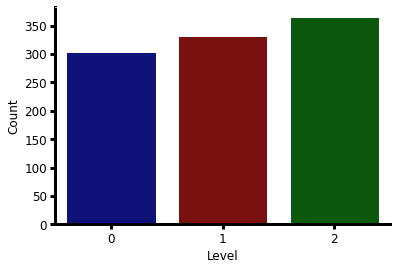

In [ ]:
#Plotter Function

import seaborn as sns
sns.set_style('ticks')
def Plotter(plot, x_label, y_label, x_rot=None, y_rot=None,  fontsize=12, fontweight=None, legend=True, save=False,save_name=None):
  ax.tick_params(direction='out', length=5, width=3, colors='k',
               grid_color='k', grid_alpha=1,grid_linewidth=2)
  
  
  
  plt.xticks(fontsize=fontsize, fontweight=fontweight, rotation=x_rot)

  plt.yticks(fontsize=fontsize, fontweight=fontweight, rotation=y_rot)

  if legend==True:

   plt.legend()

  else:

    ax.legend().remove()
        
    #Labels
    plt.xlabel(x_label, fontsize=fontsize, fontweight=fontweight, color='k')
    plt.ylabel(y_label, fontsize=fontsize, fontweight=fontweight, color='k')

    #Removing Spines and setting up remianing, preset prior to use.
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(3)
    
    if save==True:
        plt.savefig(save_name)
fig,ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.countplot(data=lung_cancer, x='Level', palette=['darkblue','darkred','darkgreen'])#Count plot
Plotter(plot, 'Level', 'Count', legend=None, save=True, save_name='Level Count.png')#Plotter function for aesthetics
plot

<Axes: xlabel='Level', ylabel='count'>

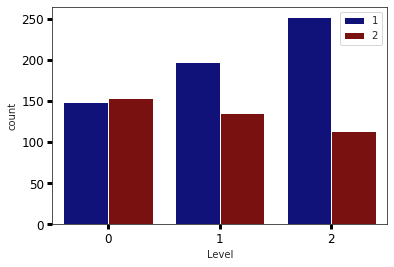

In [ ]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.countplot(data=lung_cancer, x='Level', hue='Gender', palette=['darkblue','darkred'])#Count plot
Plotter(plot, 'Level', 'Count', legend=True, save=True, save_name='Level Count by Gender.png')#Plotter function for aesthetics
plot

<Axes: xlabel='Alcohol use', ylabel='Fatigue'>

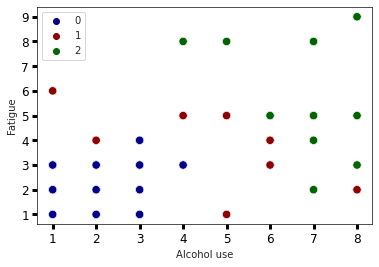

In [ ]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=lung_cancer, x='Alcohol use',y='Fatigue', hue='Level', palette=['darkblue','darkred','darkgreen'], s=70, marker='o')#Count plot
Plotter(plot, 'Alcohol use', 'Fatique', legend=True, save=True, save_name='Level Dependence on Alcohol and Fatigue.png')#Plotter function for aesthetics
plot

<Axes: xlabel='Level', ylabel='Age'>

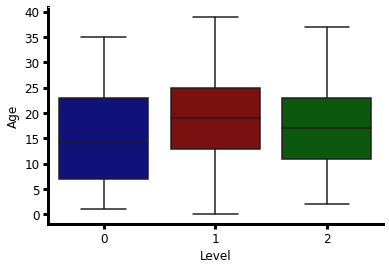

In [ ]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.boxplot(data=lung_cancer, x='Level', y='Age', palette=['darkblue','darkred','darkgreen'])#Count plot
Plotter(plot, 'Level', 'Age', legend=False, save=True, save_name='Level by Age.png')#Plotter function for aesthetics
plot

In [ ]:
#Feature Selection
from sklearn.feature_selection import SelectKBest #Feature Selector
from sklearn.feature_selection import f_classif #F-ratio statistic for categorical values

<Axes: xlabel='Score', ylabel='Feature'>

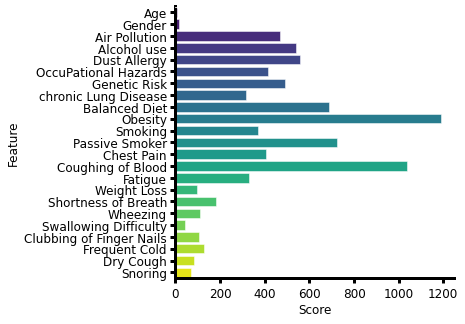

In [ ]:
X=lung_cancer.drop(['Level','Patient Id'], axis=1)
Y=lung_cancer['Level']
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

#Visualize the feature scores
fig, ax=plt.subplots(figsize=(5,5))
plot=sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')
Plotter(plot, 'Score', 'Feature', legend=False, save=True, save_name='Feature Importance.png')#Plotter function for aesthetics
plot

In [ ]:
#We will take all the features that scored more than 200 as they show the least redundancy.

#Selection method
selection=featureScores[featureScores['Score']>=200]#Selects features that scored more than 200
selection=list(selection['Feature'])#Generates the features into a list
selection.append('Level')#Adding the Level string to be used to make new data frame
new_cancer=lung_cancer[selection] #New dataframe with selected features
new_cancer.head() #Lets take a look at the first 5



,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Level
0,2,4,5,4,3,2,2,4,3,2,2,4,3,0
1,3,1,5,3,4,2,2,2,2,4,2,3,1,1
2,4,5,6,5,5,4,6,7,2,3,4,8,8,2
3,7,7,7,7,6,7,7,7,7,7,7,8,4,2
4,6,8,7,7,7,6,7,7,8,7,7,9,3,2


In [ ]:
#Spliting Data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(new_cancer.drop(['Level'], axis=1), new_cancer['Level'],test_size=0.25, random_state=0)

#Checking the shapes
print("X_train shape :",x_train.shape)
print("Y_train shape :",y_train.shape)
print("X_test shape :",x_test.shape)
print("Y_test shape :",y_test.shape)

X_train shape : (750, 13)
Y_train shape : (750,)
X_test shape : (250, 13)
Y_test shape : (250,)


In [ ]:
#Scaling Processing
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

X_train_scaled=scaler.fit_transform(x_train) #Scaling and fitting the training set to a model
X_test_scaled=scaler.transform(x_test) #Transformation of testing set based off of trained scaler model

In [ ]:
#SVM and Grid/Randomization Search
from sklearn.svm import SVC #Classifier
#Packages
"""These packages are required for the functions below
"""
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV #Paramterizers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Accuracy metrics
import itertools #Used for iterations

In [ ]:
def Searcher(estimator, param_grid, search, train_x, train_y, test_x, test_y,label=None):
    try:
        if search == "grid":
            clf = GridSearchCV(
                estimator=estimator, 
                param_grid=param_grid, 
                scoring=None,
                n_jobs=-1, 
                cv=10, #Cross-validation at 10 replicates
                verbose=0,
                return_train_score=True
            )
        elif search == "random":           
            clf = RandomizedSearchCV(
                estimator=estimator,
                param_distributions=param_grid,
                n_iter=10,
                n_jobs=-1,
                cv=10,
                verbose=0,
                random_state=1,
                return_train_score=True
            )
    except:
        print('Search argument has to be "grid" or "random"')
        sys.exit(0) #Exits program if not grid or random
        
    # Fit the model
    clf.fit(X=train_x, y=train_y)
    
    #Testing the model
    
    try:
        if search=='grid':
            cfmatrix=confusion_matrix(
            y_true=test_y, y_pred=clf.predict(test_x))
        
            #Defining prints for accuracy metrics of grid
            print("**Grid search results of", label,"**")
            print("The best parameters are:",clf.best_params_)
            print("Best training accuracy:\t", clf.best_score_)
            print('Classification Report:')
            print(classification_report(y_true=test_y, y_pred=clf.predict(test_x))
             )
        elif search == 'random':
            cfmatrix=confusion_matrix(
            y_true=test_y, y_pred=clf.predict(test_x))

            #Defining prints for accuracy metrics of grid
          
            print("**Random search results of", label,"**")
            print("The best parameters are:",clf.best_params_)
            print("Best training accuracy:\t", clf.best_score_)
            print('Classification Report:')
            print(classification_report(y_true=test_y, y_pred=clf.predict(test_x))
             )
    except:
        print('Search argument has to be "grid" or "random"')
        sys.exit(0) #Exits program if not grid or random
        
    return clf, cfmatrix; #Returns a trained classifier with best parameters

In [ ]:
#Confusion Matrix Function

def plot_confusion_matrix(cm, label,color=None,title=None):
    """
    Plot for Confusion Matrix:
    Inputs:
        cm: sklearn confusion_matrix function for y_true and y_pred as seen in https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
        title: title of confusion matrix as a 'string', default=None
        label: the unique label that represents classes for prediction can be done as sorted(dataframe['labels'].unique()).
        color: confusion matrix color, default=None, set as a plt.cm.color, based on matplot lib color gradients
    """
    
    classes=sorted(label)
    plt.imshow(cm, interpolation='nearest', cmap=color)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    thresh = cm.mean()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]), 
                 horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black") 

**Trained Model**

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
420 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
236 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_v

**Grid search results of SVC Grid **
The best parameters are: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 1}
Best training accuracy:	 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00        91

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

____________________________________________________________________________________________________


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_val

**Random search results of SVC Random **
The best parameters are: {'random_state': 1, 'kernel': 'rbf', 'gamma': 0.86, 'C': 0.61}
Best training accuracy:	 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00        91

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



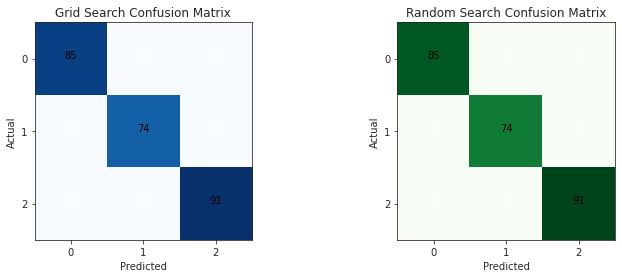

In [ ]:
svm_param = {
    "C": [.01, .1, 1, 5, 10, 100], #Specific parameters to be tested at all combinations
    "gamma": [0, .01, .1, 1, 5, 10, 100],
    "kernel": ["rbf","linear""poly"],
    "random_state": [1]}

#Randomized Grid Search SVM Parameters
svm_dist = {
    "C": np.arange(0.01,2, 0.01),   #By using np.arange it will select from randomized values
    "gamma": np.arange(0,1, 0.01),
    "kernel": ["rbf","linear""poly"],
    "random_state": [1]}

"""
Following the code above, we can set the parameters for both grid search and randomized search. The grid search will evaluate all specified 
parameters while the randomized search will look at the parameters labeled in random order at the best training accuracy. The np.arange function
allows for a multitude of points to be looked at between the set start and end values of 0.01 to 2. """

#Grid Search SVM
svm_grid, cfmatrix_grid= Searcher(SVC(), svm_param, "grid", X_train_scaled, y_train, X_test_scaled, y_test,label='SVC Grid')

print('_____'*20)#Spacer

#Random Search SVM
svm_rand, cfmatrix_rand= Searcher(SVC(), svm_dist, "random", X_train_scaled, y_train, X_test_scaled, y_test,label='SVC Random')

#Plotting the confusion matrices
plt.subplots(1,2)
plt.subplots_adjust(left=-0.5, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plot_confusion_matrix(cfmatrix_rand, title='Random Search Confusion Matrix',label=new_cancer['Level'].unique(), color=plt.cm.Greens) #grid matrix function
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title='Grid Search Confusion Matrix', label=new_cancer['Level'].unique(), color=plt.cm.Blues) #randomized matrix function

plt.savefig('confusion.png')

**Data Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[-0.35826174 -0.81990292 -0.90667901 ... -0.83861787 -0.41855027
   0.72865507]
 [-1.73374982 -0.81990292 -0.41391868 ... -1.38459305  1.54417079
  -0.6282445 ]
 [-0.14664819 -0.81990292  0.07884165 ...  1.34528283  1.54417079
  -0.6282445 ]
 ...
 [-1.09890917  1.21965659  0.07884165 ...  1.34528283  1.54417079
  -0.6282445 ]
 [-1.62794304  1.21965659  1.06436231 ...  0.25333248 -0.90923053
   0.05020528]
 [ 0.91141956 -0.81990292  1.06436231 ...  1.34528283  1.54417079
  -0.6282445 ]]


In [ ]:
X = standardized_data
Y = new_cancer['Level']

In [ ]:
new_cancer['Level'].value_counts()

2    365
1    332
0    303
Name: Level, dtype: int64

 0: Low, 
 
 2: High ,

 1: Medium , 

In [ ]:
print(X)
print(Y)

[[-0.35826174 -0.81990292 -0.90667901 ... -0.83861787 -0.41855027
   0.72865507]
 [-1.73374982 -0.81990292 -0.41391868 ... -1.38459305  1.54417079
  -0.6282445 ]
 [-0.14664819 -0.81990292  0.07884165 ...  1.34528283  1.54417079
  -0.6282445 ]
 ...
 [-1.09890917  1.21965659  0.07884165 ...  1.34528283  1.54417079
  -0.6282445 ]
 [-1.62794304  1.21965659  1.06436231 ...  0.25333248 -0.90923053
   0.05020528]
 [ 0.91141956 -0.81990292  1.06436231 ...  1.34528283  1.54417079
  -0.6282445 ]]
0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64


**Training Model**

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9706666666666667


**Model Evaluation & Accuracy Score**

In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score of the testing data : ',test_data_accuracy)

Accuracy score of the testing data :  0.964


**Buiding Predictive System**

In [ ]:
input_data = (2,	4,	5,	4,	3,	2,	2,	4,	3,	2,	2,	4,	3	)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = classifier.predict(input_data_reshaped)
print(std_data)
if (std_data[0] == 0):
  print('The person doesnt have lung cancer')
else:
  print('The person has a lung cancer')


[1]
The person has a lung cancer


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


**Saving Model has high accuracy result**

In [ ]:
import pickle

In [ ]:
filename = 'lungcancer_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('lungcancer_model.sav', 'rb'))

**Testing Our saved Model with different patient Inputs**

In [ ]:
input_data = (3,2,2,4,3,4,2,2,3,1,2,3,4	)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = classifier.predict(input_data_reshaped)
print(std_data)
if (std_data[0] == 0):
  print('The person doesnt have lung cancer')
else:
  print('The person has a lung cancer')


[0]
The person doesnt have lung cancer


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
for column in lung_cancer.columns:
  print(column)

Patient Id
Age
Gender
Air Pollution
Alcohol use
Dust Allergy
OccuPational Hazards
Genetic Risk
chronic Lung Disease
Balanced Diet
Obesity
Smoking
Passive Smoker
Chest Pain
Coughing of Blood
Fatigue
Weight Loss
Shortness of Breath
Wheezing
Swallowing Difficulty
Clubbing of Finger Nails
Frequent Cold
Dry Cough
Snoring
Level
